<a href="https://colab.research.google.com/github/alexandre-pinon/deep-learning-learning/blob/master/ztm/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Neural Network Regression with TensorFlow
There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


## Creating data to view and fit
Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

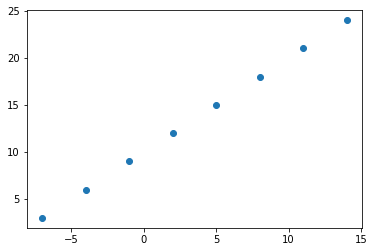

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Regression input shapes and output shapes
One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

In [4]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X.shape, y.shape

((8,), (8,))

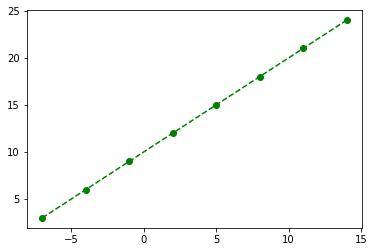

In [21]:
# Create features (using tensors)
X = tf.constant(X)

# Create labels (using tensors)
y = tf.constant(y)

# Visualize it
plt.plot(X, y, 'go--');

In [9]:
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

## Steps in modelling with TensorFlow
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [69]:
# Set random seed
tf.random.set_seed(42)

In [70]:
# Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 307ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [71]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

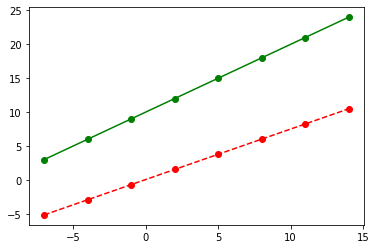

In [72]:
# Make a prediction with the model
y_pred = model.predict(X)
plt.plot(X, y, 'go-');
plt.plot(X, y_pred, 'ro--');

In [73]:
model.predict([17.])

array([[12.716021]], dtype=float32)

## Improving a model
How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [127]:
# Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation=None))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss="mae", # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.01), # Adam >> SGD :o
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 676ms/step - loss: 14.0662 - mae: 14.0662
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 13.5063 - mae: 13.5063
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 12.9456 - mae: 12.9456
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 12.3815 - mae: 12.3815
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 11.8121 - mae: 11.8121
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 11.2361 - mae: 11.2361
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6519 - mae: 10.6519
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 10.0584 - mae: 10.0584
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 9.4546 - mae: 9.4546
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 8.8395 - mae: 8.8395
Epoch 11/100
1/1 [==============================] - 0s 19ms/step

array([[26.761555]], dtype=float32)

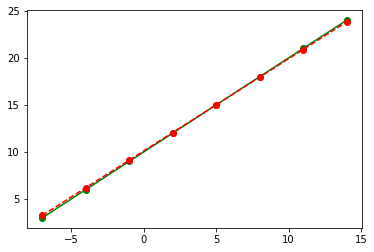

In [128]:
# Make a prediction with the model
y_pred = model.predict(X)
plt.plot(X, y, 'go-');
plt.plot(X, y_pred, 'ro--');
model.predict([17.])

## Evaluating a model
A typical workflow you'll go through when building neural networks is:

```Build a model -> evaluate it -> build (tweak) a model -> evaluate it -> build (tweak) a model -> evaluate it...```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize
When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

1. **The data** - what data are you working with? What does it look like?
2. **The model itself** - what does the architecture look like? What are the different shapes?
3. **The training of a model** - how does a model perform while it learns?
4. **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

In [129]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [130]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [131]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [132]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Split data into training/test set
One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

1. **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
2. **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
3. **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

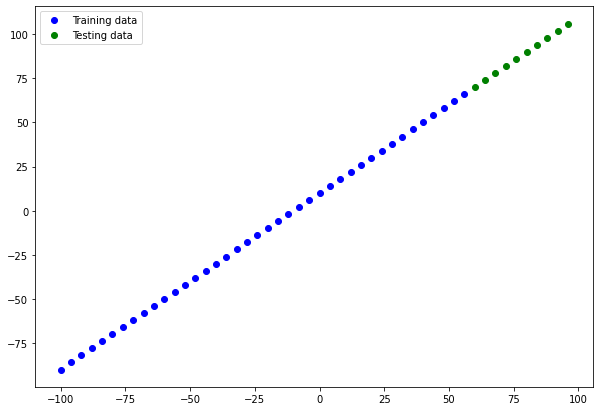

In [139]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.plot(X_train, y_train, 'bo', label='Training data')
# Plot test data in green
plt.plot(X_test, y_test, 'go', label='Testing data')
# Show the legend
plt.legend();

In [155]:
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [157]:
X_train.ndim

1

In [184]:
# Create a model using the Sequential API
model = tf.keras.Sequential(name="aha_model")
model.add(tf.keras.layers.Dense(16, input_shape=[X_train.ndim], name='input_layer'))
model.add(tf.keras.layers.Dense(1, name='output_layer'))

# Compile the model
model.compile(loss="mae", # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.01), # Adam >> SGD :o
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [185]:
model.summary()

Model: "aha_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 16)                32        
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

- **Total params** - total number of parameters in the model.
- **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
- **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

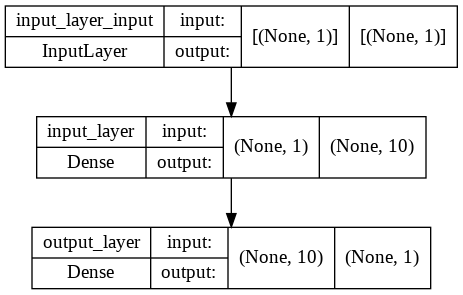

In [182]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

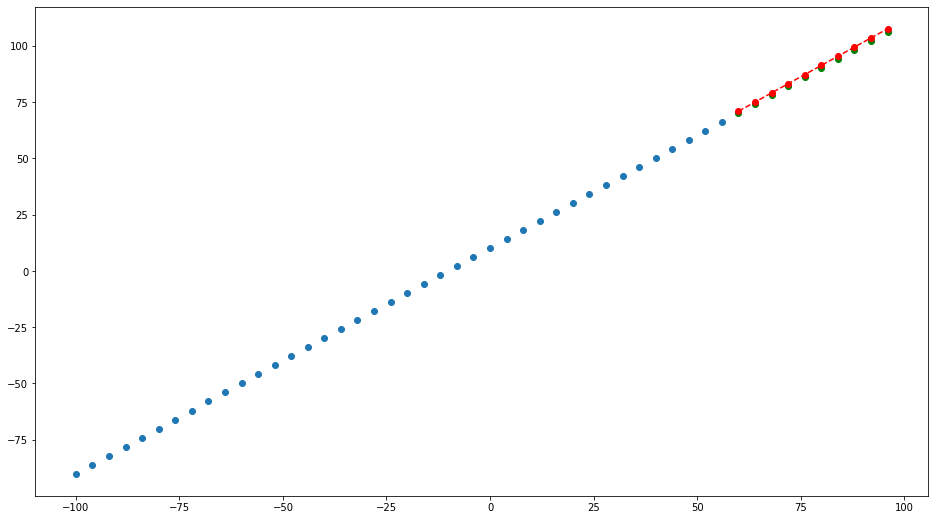

In [186]:
# Make a prediction with the model
y_pred = model.predict(X_test)
plt.figure(figsize=(16, 9))
plt.plot(X_train, y_train, 'o')
plt.plot(X_test, y_test, 'go')
plt.plot(X_test, y_pred, 'ro--')

## Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

- **Mean absolute error (MAE)** - the mean difference between each of the predictions.
- **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [187]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 316ms/step - loss: 1.1961 - mae: 1.1961


[1.196112036705017, 1.196112036705017]

In [189]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.279675, 14.220329, 11.987268, 10.580492, 10.      , 10.245793,
       11.317874, 13.216234, 15.940882, 19.491821], dtype=float32)>

In [190]:
# Check the test label tensor values
y_test

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [192]:
# Check the predictions tensor values (notice the extra square brackets)
y_pred

array([[ 70.900406],
       [ 74.96612 ],
       [ 79.03183 ],
       [ 83.09754 ],
       [ 87.16325 ],
       [ 91.228966],
       [ 95.294685],
       [ 99.36039 ],
       [103.4261  ],
       [107.49182 ]], dtype=float32)

In [194]:
# Check the tensor shapes
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [197]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_test, 
                                     y_pred.squeeze()) # use squeeze() to make same shape
mae.numpy()

1.1961113

## Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

- `model_1` - same as original model, 1 layer, trained for 100 epochs.
- `model_2` - 2 layers, trained for 100 epochs.
- `model_3` - 2 layers, trained for 500 epochs.

Build `model_1`

In [207]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [208]:
model_1.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


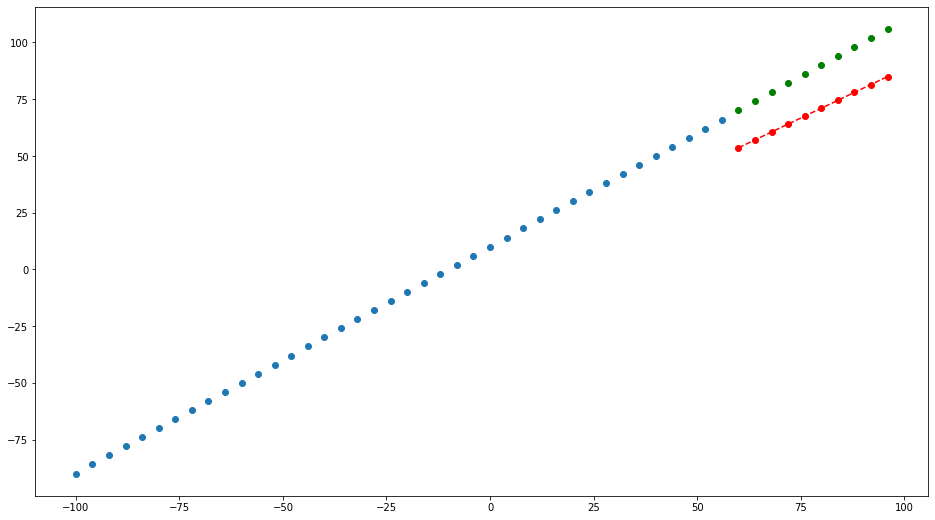

In [209]:
# Make a prediction with the model_1
y_pred = model_1.predict(X_test)
plt.figure(figsize=(16, 9))
plt.plot(X_train, y_train, 'o')
plt.plot(X_test, y_test, 'go')
plt.plot(X_test, y_pred, 'ro--')

In [210]:
# Calculate model_1 metrics
mae_1 = tf.metrics.mean_absolute_error(y_test, y_pred.squeeze()).numpy() # use squeeze() to make same shape
mse_1 = tf.metrics.mean_squared_error(y_test, y_pred.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

Build `model_2`

(3.1969407, 13.070143)

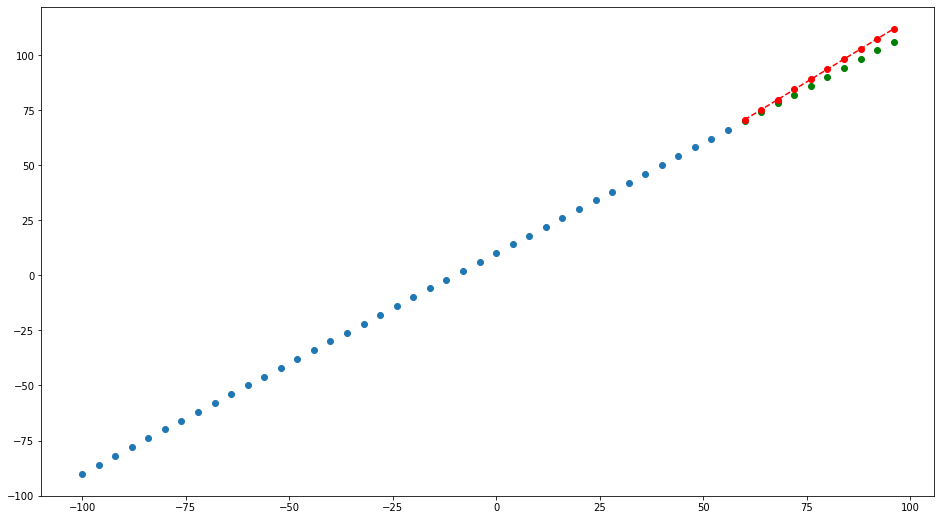

In [211]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

# Make a prediction with the model_2
y_pred = model_2.predict(X_test)
plt.figure(figsize=(16, 9))
plt.plot(X_train, y_train, 'o')
plt.plot(X_test, y_test, 'go')
plt.plot(X_test, y_pred, 'ro--')

# Calculate model_2 metrics
mae_2 = tf.metrics.mean_absolute_error(y_test, y_pred.squeeze()).numpy() # use squeeze() to make same shape
mse_2 = tf.metrics.mean_squared_error(y_test, y_pred.squeeze()).numpy()
mae_2, mse_2

Build `model_3`

(68.713615, 4808.0273)

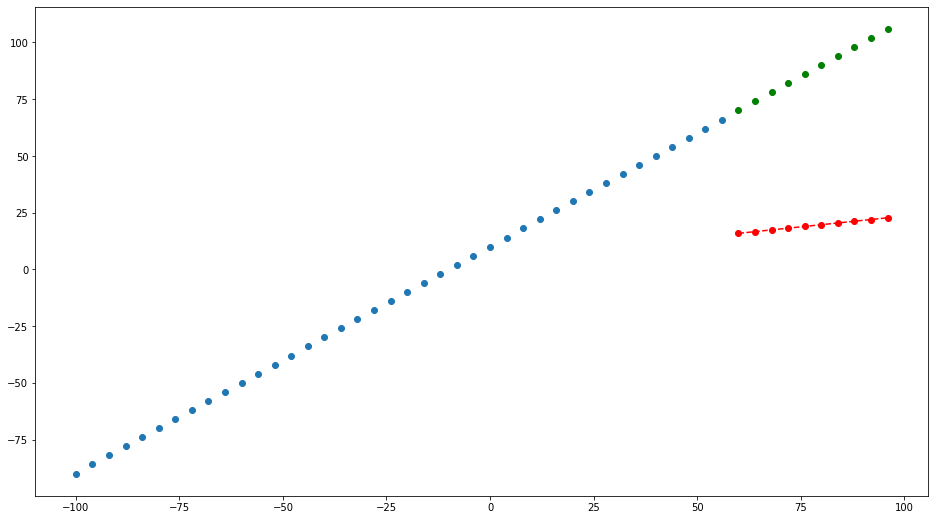

In [212]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

# Make a prediction with the model_3
y_pred = model_3.predict(X_test)
plt.figure(figsize=(16, 9))
plt.plot(X_train, y_train, 'o')
plt.plot(X_test, y_test, 'go')
plt.plot(X_test, y_pred, 'ro--')

# Calculate model_3 metrics
mae_3 = tf.metrics.mean_absolute_error(y_test, y_pred.squeeze()).numpy() # use squeeze() to make same shape
mse_3 = tf.metrics.mean_squared_error(y_test, y_pred.squeeze()).numpy()
mae_3, mse_3

## Comparing results
Now we've got results for 3 similar but slightly different results, let's compare them.

In [216]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [217]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [218]:
model_2.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 10)                20        
                                                                 
 dense_107 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments
One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

>📖 Resource: But as you build more models, you'll want to look into using tools such as:
- **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
- **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving a model
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

- The SavedModel format (default).
- The HDF5 format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [219]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [220]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [221]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 10)                20        
                                                                 
 dense_107 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [223]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
tf.metrics.mean_squared_error(y_test, model_2_preds.squeeze()).numpy() == tf.metrics.mean_squared_error(y_test, saved_model_preds.squeeze()).numpy()

True

In [224]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 10)                20        
                                                                 
 dense_107 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [225]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
tf.metrics.mean_squared_error(y_test, h5_model_preds.squeeze()).numpy() == tf.metrics.mean_squared_error(y_test, model_2_preds.squeeze()).numpy()

True

## Downloading a model (from Google Colab)
Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

- Right click on the file in the files pane and click 'download'.
- Use the code below.

In [226]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A larger example

In [227]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [228]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [230]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [232]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [237]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [238]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [239]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [240]:
X.shape, y.shape

((1338, 11), (1338,))

In [241]:
from sklearn.model_selection import train_test_split

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
X_train.shape, y_train.shape

((1070, 11), (1070,))

In [249]:
X_test.shape, y_test.shape

((268, 11), (268,))

In [250]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
], name='insurance_model_1')

# Compile the model
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 12936.5752 - mae: 12936.5752
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12091.7373 - mae: 12091.7373
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 11264.6709 - mae: 11264.6709
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 10507.7217 - mae: 10507.7217
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9859.0059 - mae: 9859.0059
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9310.6621 - mae: 9310.6621
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8837.3008 - mae: 8837.3008
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 8451.8438 - mae: 8451.8438
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 8146.1074 - mae: 8146.1074
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7902.5376 - mae: 7

In [252]:
# Make a prediction with the model
y_pred = model.predict(X_test)

# Calculate model metrics
mae = tf.metrics.mean_absolute_error(y_test, y_pred.squeeze()).numpy() # use squeeze() to make same shape
mse = tf.metrics.mean_squared_error(y_test, y_pred.squeeze()).numpy()
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 7000.72998046875
MSE: 163108656.0


In [257]:
model.summary()

Model: "insurance_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


Our model didn't perform very well, let's try a bigger model.

In [313]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1)
], name='insurance_model_2')

# Compile the model
model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])

# Fit the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [314]:
# Make a prediction with the model
y_pred = model.predict(X_test)

# Calculate model metrics
mae = tf.metrics.mean_absolute_error(y_test, y_pred.squeeze()).numpy() # use squeeze() to make same shape
mse = tf.metrics.mean_squared_error(y_test, y_pred.squeeze()).numpy()
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 1853.3814697265625
MSE: 21180418.0


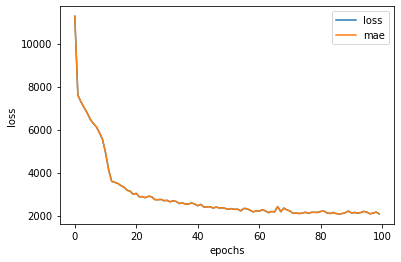

In [315]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [309]:
y_test.describe()

count      268.000000
mean     12968.317063
std      12483.196202
min       1131.506600
25%       4288.744850
50%       8487.880300
75%      16367.829375
max      63770.428010
Name: charges, dtype: float64

>🤔 Question: How long should you train for?

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving. We'll see this in another module.

## Preprocessing data (normalization and standardization)
A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

- Turning all of your data to numbers (a neural network can't handle strings).
Making sure your data is in the right shape (verifying input and output shapes).
- **Feature scaling**:
  - Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
  - Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
  - Which one should you use?
    - With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

>📖 Resource: For more on preprocessing data, I'd recommend reading the following resources:
- Scikit-Learn's documentation on preprocessing data.
- Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale.

We've already turned our data into numbers using get_dummies(), let's see how we'd normalize it as well.

In [325]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [326]:
# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [331]:
# Create X & y
X = df.drop("charges", axis=1)
y = df["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [332]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


In [335]:
X_train_normal[:5]

array([[0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.45652174, 0.49394673, 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.7826087 , 0.14823783, 0.6       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]])

In [337]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [404]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(1)
], name='insurance_model_3')

# Compile the model
model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])

# Fit the model
history = model.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [405]:
# Make a prediction with the model
y_pred = model.predict(X_test_normal)

# Calculate model metrics
mae = tf.metrics.mean_absolute_error(y_test, y_pred.squeeze()).numpy() # use squeeze() to make same shape
mse = tf.metrics.mean_squared_error(y_test, y_pred.squeeze()).numpy()
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 1644.3916015625
MSE: 20282648.0


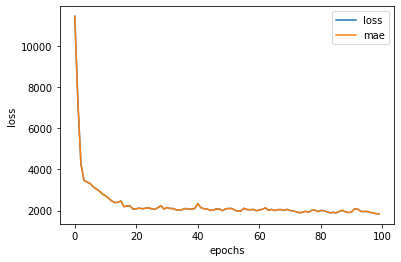

In [406]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()